In [2]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
import SimpleITK as sitk  
#from radiomics.featureextractor import *
from sklearn import mixture
from skimage.feature import peak_local_max
from skimage import segmentation

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 

In [3]:

import csv
import SimpleITK as sitk

In [4]:
csv_ahl_post_process= '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/ahl_tmtv_watershed_result.csv'

with open(csv_ahl_post_process, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [5]:
csv_data[0]

['13011101051022',
 '1.2.840.113619.2.290.3.2831165510.988.1366867863.298',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_mask_pred_float.nii',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_mask.nii',
 '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/mot_an_apr 25_2013.csv',
 '508.29798592676525',
 '511.7453171444504',
 '422.18805295735365',
 '16.940836940836938']

In [6]:
truth = []
sous_seg = []
pourcent = []
for row in csv_data : 
    truth.append(float(row[-4]))
    sous_seg.append(float(row[-2]))
    pourcent.append(float(row[-1]))

21.891860929352184
25.089695628307172
-18.157401297426617
73.9146277709534


Text(0, 0.5, 'sous_seg')

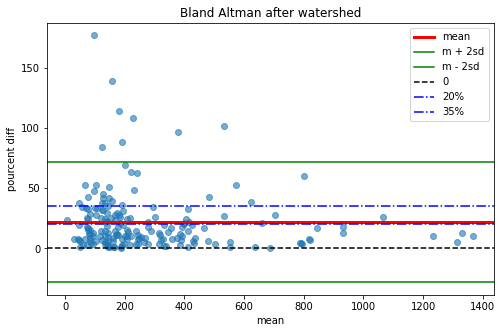

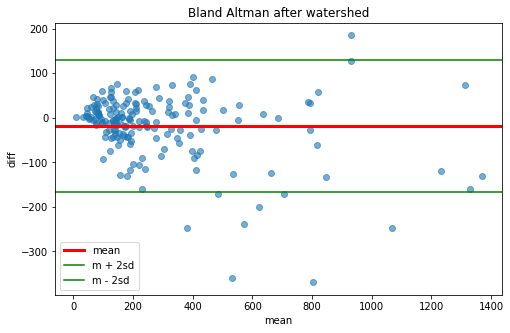

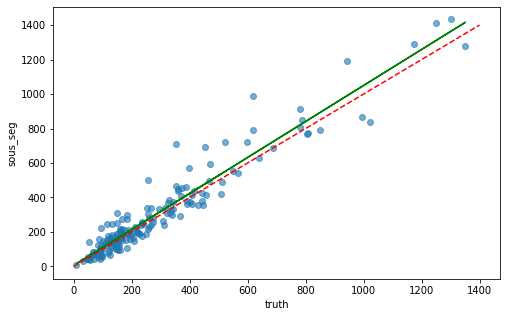

In [7]:
mean = []
diff = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))

    diff.append(truth[i] - sous_seg[i])


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(0, c='black', linestyle='--',label = '0' )
plt.axhline(20, c='blue',label = '20%', linestyle='dashdot' )
plt.axhline(35, c='blue',label = '35%' ,linestyle='dashdot' )
plt.scatter(mean, pourcent, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')





f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(diff)
sd = np.std(diff)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('diff')
plt.legend()
plt.title('Bland Altman after watershed')



from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(truth, sous_seg)

def regression(x, slope, intercept):
    y = []
    for i in range(len(x)):
        y.append(slope * x[i] + intercept)

    return y 


f = plt.figure(figsize=(8,5))
axes = plt.gca()
plt.scatter(truth, sous_seg, alpha=0.6)
plt.plot(truth, regression(truth, slope, intercept), c='green', label='regression lin')
plt.plot([0,1400], [0,1400], 'r--', label='x=y')
plt.xlabel('truth')
plt.ylabel('sous_seg')

In [8]:
print(r_value)

0.962202123353695


In [ ]:
#examples

In [29]:
vol_big_diff = []
for row in csv_data : 
    if float(row[-1]) > float(20) : 
        vol_big_diff.append(float(row[-4]))


In [31]:
print("diff sup à 20% :", len(vol_big_diff))
cpt = 0
for item in vol_big_diff : 
    if item < 200 : 
        cpt += 1

cpt 

diff sup à 20% : 69


47

In [27]:
sorted(vol_big_diff)

[52.083212595773645,
 55.781885839377686,
 69.6800990808697,
 82.90709332744882,
 83.35331441247442,
 87.3649859159751,
 89.14705776799251,
 92.32001899275929,
 92.352,
 93.61582434408774,
 99.07980050006812,
 102.5524844526208,
 113.15070124430349,
 114.78879480164323,
 118.464,
 118.822905801062,
 123.59049152764783,
 126.47549212117156,
 130.55314216253464,
 132.22104415064678,
 146.81719122127106,
 148.16189488774398,
 148.78516186978592,
 149.03594655857887,
 153.44291292334674,
 159.54379097023403,
 160.31999044418336,
 167.8498368483551,
 168.10921382161905,
 183.91125420362698,
 184.49360071853454,
 184.87265638259822,
 251.38623815772007,
 255.488,
 352.8746912400675,
 354.058249601999,
 398.208,
 451.9034068994176,
 523.2,
 616.8615999238627]

In [33]:
cpt = 0
for row in csv_data : 
    if float(row[-4]) < 200 : 
        cpt += 1

cpt

99